In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [3]:
df = pd.read_csv("SMSSpamCollection.csv",names=['label','message'])

In [4]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


(-0.5, 1599.5, 799.5, -0.5)

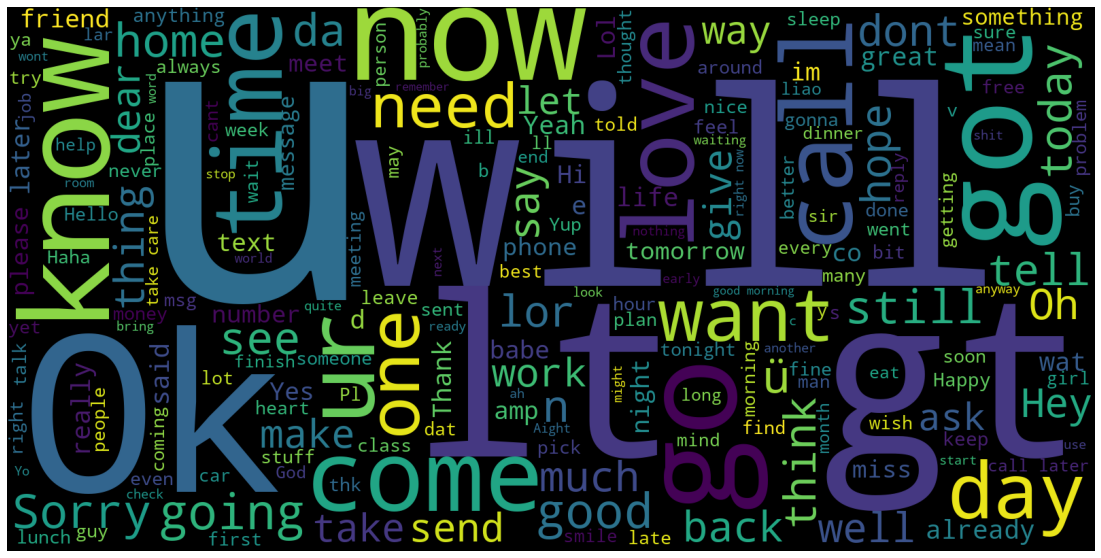

In [7]:
ms1 = pd.Series((df.loc[df['label']=='ham','message']).tolist()).astype(str)
wordcloud = WordCloud(stopwords=STOPWORDS,width=1600,height=800,background_color='black').generate(" ".join(ms1))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

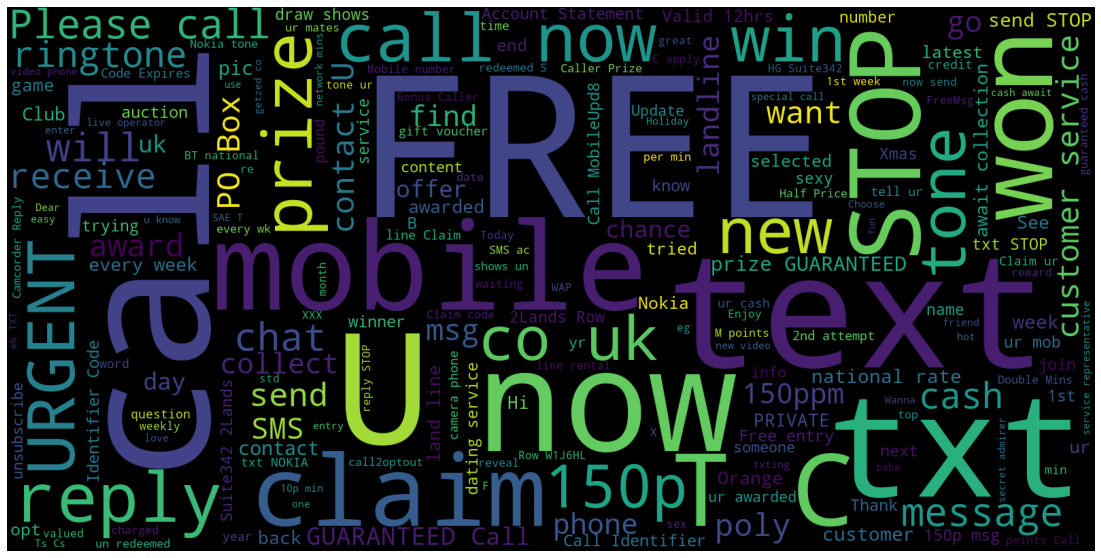

In [8]:
ms2 = pd.Series((df.loc[df['label']=='spam','message']).tolist()).astype(str)
wordcloud = WordCloud(stopwords=STOPWORDS,width=1600,height=800,background_color='black').generate(" ".join(ms2))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

In [9]:
lemmatizer = WordNetLemmatizer()
corpus = []

In [10]:
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['message'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(i) for i in review if not i in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000)

In [12]:
X = cv.fit_transform(corpus).toarray()

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['label'])

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
from sklearn.naive_bayes import MultinomialNB
sd = MultinomialNB()
sd.fit(X_train,y_train)

MultinomialNB()

In [16]:
x_pred = sd.predict(X_train)
y_pred = sd.predict(X_test)

In [17]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score
print("Training accuracy:",accuracy_score(y_train,x_pred))
print("Testing accuracy:",accuracy_score(y_test,y_pred))

Training accuracy: 0.9779851639148122
Testing accuracy: 0.9712849964106246


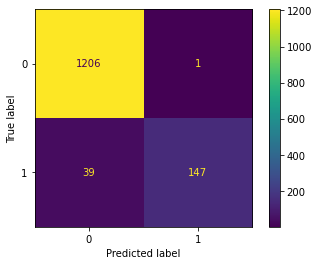

In [18]:
plot_confusion_matrix(sd,X_test,y_test,values_format='d')

In [19]:
from pickle import dump,load
tfid = 'tfid.sav'
nb = 'nb.sav'

In [20]:
dump(cv,open(tfid,'wb'))
dump(sd,open(nb,'wb'))

In [21]:
def preprocess(raw_mess):
    review = re.sub('[^a-zA-Z]',' ',raw_mess)
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(i) for i in review if not i in set(stopwords.words('english'))]
    review = ' '.join(review)
    return review

In [22]:
def predict(mess):
    vect = load(open(tfid,'rb'))
    classifier = load(open(nb,'rb'))
    clean = preprocess(mess)
    clean_encoded = vect.transform([clean])
    pred = classifier.predict(clean_encoded)
    return pred

In [25]:
msg = input("Enter a message: ")
predi = predict(msg)
if predi == 1:
    print("It is a spam")
else:
    print("Not a spam")

Enter a message: Join and earn 100000 per month free cash daily
It is a spam
